# Experiment 3
## Comparing Text Featurization between Word2Vec and Doc2Vec
Name: Xin Wei Lam<br>
Username: xl00751<br>
URN: 6525195

I will be comparing between 3 text vectorizers - Tensorflow, Word2Vec and Doc2Vec. Tensorflow was decided on by the group for implementing our base model. I chose Word2Vec as it was a popular method of text featurization, and I had chosen Doc2Vec as its purpose was to determine the overall sentiment of a sentence or document, which seemed to suit our problem and dataset.

In [1]:
import keras
import numpy as np
import pandas as pd
import pickle
import sklearn
import tensorflow as tf
import utils
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Dropout, Conv1D, GlobalMaxPooling1D, Embedding
from sklearn.metrics import classification_report

In [2]:
# File paths

# Data Directory
DATA_DIR = "data"

# Balanced datasets
BALANCED_TRAIN_DATASET = "data/balanced_dataset.pickle"
BALANCED_TEST_DATASET = "data/balanced_test_dataset.pickle"

# Preprocessed balanced data
PREPROCESSED_BAL_TRAIN_DATASET = "data/preprocessed_train.pickle"
PREPROCESSED_BAL_TEST_DATASET = "data/preprocessed_test.pickle"

# Word2Vec model
WORD2VEC_MODEL = "models/word2vec_model"

# Doc2Vec model
DOC2VEC_MODEL = "models/doc2vec_model"

In [3]:
# Function to save data as a .pickle file
# Params: 
    # List or Dataframe - @data: Data to be saved as pickle
    # Str - @folder: folder name
    # Str - file name
# Output: Pickle file in directory/repo 
def save_pickle(data, folder, file_name):
    with open("{0}/{1}.pickle".format(folder, file_name), 'wb') as f:
        pickle.dump(data, f)
    print(f"Saved data is stored in \'{folder}\' in the form of {file_name}.pickle")
    #pickle.dump(data, open("data/{0}.pickle".format(file_name),"wb"))

# Function to load pickle file
# Params:
    # Str - @file_path: File path of pickle file
# Output:
    # Saved object in original file type (list/dataframe)
def load_pickle(file_path):
    return pickle.load(open(file_path, "rb"))

In [4]:
# Load datasets

# Get preprocessed train dataset
bal_train_dataset = load_pickle(PREPROCESSED_BAL_TRAIN_DATASET)

# Get preprocessed test dataset
bal_test_dataset = load_pickle(PREPROCESSED_BAL_TEST_DATASET)

# Get train_y
bal_train_y = pd.read_pickle(BALANCED_TRAIN_DATASET)
bal_train_y = bal_train_y.drop(columns="comment_text")

# Get test_y
bal_test_y = pd.read_pickle(BALANCED_TEST_DATASET)
bal_test_y = bal_test_y.drop(columns="comment_text")

In [5]:
# Experiment-specific imports
from gensim.models import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Tensorflow
I will not be training the model as it is identical to the model used with NLTK Lemmatizer in experiment 1.

In [6]:
# Constants for preparing data
NUM_WORDS = 20000
MAX_LEN = 100

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Use Tensorflow's Tokenizer for text featurization
tokenizer = Tokenizer(NUM_WORDS)

# Update internal vocabulary
tokenizer.fit_on_texts(bal_train_dataset)

# Turn each word into its corresponding integer
train_x = tokenizer.texts_to_sequences(bal_train_dataset)

# Pad sequences
train_x = keras.preprocessing.sequence.pad_sequences(train_x, MAX_LEN)
train_x = np.array(train_x)

In [8]:
# Prepare test_x

# Turn each word into its corresponding integer
test_x = tokenizer.texts_to_sequences(bal_test_dataset)

# Pad sequences
test_x = keras.preprocessing.sequence.pad_sequences(test_x, MAX_LEN)
test_x = np.array(test_x)

# Word2Vec

In [9]:
# Word2Vec constants
W2V_SIZE = 100          # default is 100
W2V_WINDOW_SIZE = 5     # default is 5
W2V_MIN_COUNT = 5       # default is 5
W2V_SG = 0              # default is 0
W2V_EPOCHS = 10

In [10]:
# Function to create and save Word2Vec model
# Params: 
    # @sentences, @vector_size, @window, @min_count and @sg are gensim Word2Vec model params
    # List      - @sentences:   tokens that have been fully pre-processed
    # Int       - @size:        dimensionality of word vectors (typically between 100-300)
    # Int       - @window_size: max distance between current and predicted word in a sentence
    # Int       - @min_count:   ignores all words with total frequency lower than this
    # Binary    - @sg:          training algorithm, 0 - CBOW, 1 - skip-gram 
    # Str       - @file_name:   model name
# Output: Model file in directory/repo 
def word2vec_create_model(sentences, size, window, min_count, sg, file_name):
    model = Word2Vec(sentences=sentences, size=size, window=window, min_count=min_count, sg=sg)
    model.save("{0}.model".format(file_name))

# Function to load Word2Vec model
# Params: Str - file name
# Returns: Model - word2vec model
def word2vec_load_model(file_name):
    return Word2Vec.load("{0}.model".format(file_name))

The following cell creates the Word2Vec model that is trained once, then it can be saved and loaded without the need for running the model creation and training it again.

In [8]:
# File path to save the model
SAVE_WORD2VEC_MODEL = "models/word2vec_model.model"

# Create Word2Vec CBOW Model
word2vec_create_model(bal_train_dataset, W2V_SIZE, W2V_WINDOW_SIZE, W2V_MIN_COUNT, W2V_SG, WORD2VEC_MODEL)

# Initialize model
word2vec_model = word2vec_load_model(WORD2VEC_MODEL)

# Train model
word2vec_model.train(bal_train_dataset, total_examples=word2vec_model.corpus_count, epochs = 10)

# Save trained model
word2vec_model.save(SAVE_WORD2VEC_MODEL)

In [11]:
# Load trained model
word2vec_model = word2vec_load_model(WORD2VEC_MODEL)

In [10]:
# Print vocab to test between vocab and dataset
vocab = list(word2vec_model.wv.vocab)
print(vocab[:100])
print(bal_train_dataset[:2])

['cocksucker', 'piss', 'around', 'work', 'gay', 'white', 'two', 'way', 'erase', 'comment', 'ww', 'holocaust', 'jew', 'head', 'go', 'meeting', 'doubt', 'word', 'bible', 'homosexuality', 'sin', 'make', 'forehead', 'mass', 'pal', 'first', 'last', 'warn', 'fuck', 'wont', 'appreciate', 'nazi', 'would', 'write', 'page', 'dont', 'wish', 'talk', 'anymore', 'dark', 'side', 'stupid', 'peace', 'shit', 'stop', 'delete', 'stuff', 'asshole', 'die', 'fall', 'hole', 'hell', 'hi', 'back', 'undo', 'edits', 'pair', 'weiner', 'think', 'fagget', 'get', 'burn', 'hate', 'sorry', 'cant', 'sex', 'im', 'run', 'reply', 'loser', 'un', 'defines', 'vietnam', 'part', 'southeast', 'asia', 'far', 'know', 'use', 'french', 'country', 'anyway', 'culture', 'always', 'influence', 'sea', 'han', 'chinese', 'proper', 'fringe', 'indigenous', 'tribe', 'admit', 'vietnamese', 'bunch', 'wannabe', 'crap', 'people', 'east', 'asian']
[['cocksucker', 'piss', 'around', 'work'], ['gay', 'antisemmitian', 'archangel', 'white', 'tiger', 'm

In [11]:
# Printing vectors and vocab 
w1 = bal_train_dataset[0][0] # 1st word of 1st document
w2 = bal_train_dataset[0][1] # 2nd word of 1st document
print(f"Shape of w1 \'{w1}\': {word2vec_model.wv.get_vector(w1).shape}")
print(f"Shape of w2 \'{w2}\': {word2vec_model.wv.get_vector(w2).shape}")
 
print("Vocab:", len(word2vec_model.wv.vocab))

# Print the size of the word2vec vector for one word
w3 = bal_train_dataset[1][3]
print(f"Length of the vector for w3 \'{w3}\':", len(word2vec_model.wv.get_vector(w3)))

Shape of w1 'cocksucker': (100,)
Shape of w2 'piss': (100,)
Vocab: 4679
Length of the vector for w3 'white': 100


In [12]:
# Remove words not in word2vec model
# Params: 
#   Word2Vec Model  - @model:           Word2Vec Model
#   List            - @all_comments:    Pre-processed tokens (2D List)
# Output: List - Tokens with only words in model's vocab (2D List)
def word2vec_remove_words_outside_vocab(model, all_comments):
    # Remove words not in w2v cbow model vocab
    doc = []
    for comment in all_comments:
        temp = []
        for word in comment:
            if word in model.wv.vocab:
                temp.append(word)
        doc.append(temp)
    return doc

# Average word vectors of each comment
# Params:
#   Word2Vec Model  - @model:             Word2Vec Model 
#   List            - @comment_vocab:     Tokens with only words in model's vocab (2D List)
# Output: 
#   Numpy Array of average vector of each comment
def word2vec_average_vectors(model, comment_vocab):

    average_list = []

    for comment in comment_vocab:

        comment_vectors = []

        for word in comment:
            comment_vectors.append((model.wv.get_vector(word)))
        
        comment_vectors_np = np.asarray(comment_vectors, dtype='float32')
        mean = np.mean(comment_vectors_np, keepdims=True)
        average_list.append(mean)
    
    return np.asarray(average_list, dtype='float32')

In [13]:
# Remove words that are not in Word2Vec vocab
word2vec_removed_words = word2vec_remove_words_outside_vocab(word2vec_model, bal_train_dataset)

# Print word2vec_removed_words to compare against original text
print(word2vec_removed_words[:2])
print(bal_train_dataset[:2])

[['cocksucker', 'piss', 'around', 'work'], ['gay', 'white', 'two', 'way', 'erase', 'comment', 'ww', 'holocaust', 'jew', 'head', 'go', 'meeting', 'doubt', 'word', 'bible', 'homosexuality', 'sin', 'make', 'forehead', 'go', 'mass', 'gay', 'pal', 'first', 'last', 'warn', 'fuck', 'gay', 'wont', 'appreciate', 'nazi', 'would', 'write', 'page', 'dont', 'wish', 'talk', 'anymore', 'dark', 'side']]
[['cocksucker', 'piss', 'around', 'work'], ['gay', 'antisemmitian', 'archangel', 'white', 'tiger', 'meow', 'greetingshhh', 'uh', 'two', 'way', 'erase', 'comment', 'ww', 'holocaust', 'brutally', 'slay', 'jew', 'gaysgypsysslavsanyone', 'antisemitian', 'shave', 'head', 'bald', 'go', 'skinhead', 'meeting', 'doubt', 'word', 'bible', 'homosexuality', 'deadly', 'sin', 'make', 'pentagram', 'tatoo', 'forehead', 'go', 'satanistic', 'mass', 'gay', 'pal', 'first', 'last', 'warn', 'fuck', 'gay', 'wont', 'appreciate', 'nazi', 'shwain', 'would', 'write', 'page', 'dont', 'wish', 'talk', 'anymore', 'beware', 'dark', 's

In [14]:
# Calculate the average of each comment
word2vec_average = word2vec_average_vectors(word2vec_model, word2vec_removed_words)
# Warning appears because some documents are empty

C:\Users\lamxw\anaconda3\envs\grp7_env\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\lamxw\anaconda3\envs\grp7_env\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


In [13]:
# Constants for keras model
NUM_WORDS = 20000
MAX_LEN = 100

In [15]:
# Pad vectors as needed that cannot be used with Keras' sequential padding
# Params: 
    # Numpy array - @vector_array: Vectors of data to be used in keras converted to np array
# Outputs: 
    # Numpy array - @padded_array: Padded vectors
def pad(vector_array, max_len):
    padded_array = np.zeros((max_len, vector_array.shape[-1]))
    padded_array[:len(vector_array),:] = vector_array
    return padded_array

# Modified from basic model
def modified_build_model():
    EPOCHS = 30
    INIT_LR = 1e-3

    model = Sequential()

    #model.add(Embedding(num_words, 128))
    model.add(Dropout(0.4))
    model.add(Conv1D(128, 7, padding="valid", activation="relu", strides=3))
    model.add(Conv1D(128, 7, padding="valid", activation="relu", strides=3))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(128, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(6, activation='sigmoid'))

    adam = tf.keras.optimizers.Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)

    model.compile(loss='binary_crossentropy',
                optimizer=adam,
                metrics=['accuracy'])

    return model

In [17]:
# Pad word2vec_average to use for training
word2vec_train_x = np.stack(list(map(lambda x: pad(x, MAX_LEN), word2vec_average)))

In [18]:
# Train model
model_w2v = modified_build_model()

model_w2v.fit(word2vec_train_x, bal_train_y, batch_size=60, epochs=30)

# Save model to use for evaluation
model_w2v.save('models/exp3_word2vec')

Epoch 1/30
119/119 [==============================] - 17s 26ms/step - loss: 0.6373 - accuracy: 0.5774
Epoch 2/30
119/119 [==============================] - 3s 24ms/step - loss: 0.5598 - accuracy: 0.2622
Epoch 3/30
119/119 [==============================] - 3s 25ms/step - loss: 0.5536 - accuracy: 0.3247
Epoch 4/30
119/119 [==============================] - 3s 25ms/step - loss: 0.5538 - accuracy: 0.3188
Epoch 5/30
119/119 [==============================] - 3s 26ms/step - loss: 0.5575 - accuracy: 0.2967
Epoch 6/30
119/119 [==============================] - 3s 26ms/step - loss: 0.5524 - accuracy: 0.3005
Epoch 7/30
119/119 [==============================] - 4s 30ms/step - loss: 0.5569 - accuracy: 0.2871
Epoch 8/30
119/119 [==============================] - 3s 27ms/step - loss: 0.5553 - accuracy: 0.3416
Epoch 9/30
119/119 [==============================] - 3s 26ms/step - loss: 0.5522 - accuracy: 0.2935
Epoch 10/30
119/119 [==============================] - 3s 24ms/step - loss: 0.5539 - accur

In [16]:
# Prepare test dataset

# Remove words that are not in Word2Vec vocab
word2vec_remove_test = word2vec_remove_words_outside_vocab(word2vec_model, bal_test_dataset)

# Calculate the average of each comment
word2vec_average_test = word2vec_average_vectors(word2vec_model, word2vec_remove_test)

# Pad word2vec_average to use for training
word2vec_test_x = np.stack(list(map(lambda x: pad(x, MAX_LEN), word2vec_average_test)))

# Doc2Vec

In [17]:
# Gensim Doc2Vec constants
D2V_SIZE = 100          # default is 100
D2V_WINDOW_SIZE = 5     # default is 5
D2V_MIN_COUNT = 5       # default is 5
D2V_DM_MEAN = 1
D2V_DBOW_WORDS = 0
D2V_EPOCHS = 10

In [18]:
# Function to create and save Doc2Vec model
# Params: 
    # @documents, @vector_size, @window, @min_count, @dm_mean and @dbow_words are Doc2Vec model params
    # TaggedDocument    - @documents:   input corpus with pre-processed tokens in 2D list form
    # Int               - @size:        dimensionality of word vectors (typically between 100-300)
    # Int               - @window: max distance between current and predicted word in a sentence
    # Int               - @min_count:   ignores all words with total frequency lower than this
    # Binary            - @dm_mean:     sum or mean of word vectors; 0 - sum, 1 - mean
    # Binary            - @dbow_words:  training algorithm, 0 - bow, 1 - skip-gram and bow 
    # Str               - @file_name:   model name
# Output: Model file in directory/repo 
def doc2vec_create_model(documents, size, window, min_count, dm_mean, dbow_words, file_name):
    model = Doc2Vec(documents=documents, vector_size=size, window=window, min_count=min_count, dm_mean=dm_mean, dbow_words=dbow_words)
    model.save("{0}.model".format(file_name))

# Function to load Doc2Vec model
# Params: Str - file name
# Returns: Model - doc2vec model
def doc2vec_load_model(file_name):
    return Word2Vec.load("{0}.model".format(file_name))

In [19]:
# Set up comments for Gensim Doc2Vec Model
comments = [TaggedDocument(comment, [i]) for i, comment in enumerate(bal_train_dataset)]

In [14]:
# File path to save the model
SAVE_DOC2VEC_MODEL = "models/doc2vec_model.model"

# Create Doc2Vec model
doc2vec_create_model(comments, D2V_SIZE, D2V_WINDOW_SIZE, D2V_MIN_COUNT, D2V_DM_MEAN, D2V_DBOW_WORDS, DOC2VEC_MODEL)

# Initialize model
doc2vec_model = doc2vec_load_model(DOC2VEC_MODEL)

# Train model
doc2vec_model.train(comments, total_examples=doc2vec_model.corpus_count, epochs=D2V_EPOCHS)

# Save trained model
doc2vec_model.save(SAVE_DOC2VEC_MODEL)

In [20]:
# Load trained model
doc2vec_model = doc2vec_load_model(DOC2VEC_MODEL)

In [39]:
# Printing vectors and vocab
w1 = bal_train_dataset[0][0] # 1st word of 1st document
w2 = bal_train_dataset[0][1] # 2nd word of 1st document
print(f"Shape of w1 \'{w1}\': {doc2vec_model.wv.get_vector(w1).shape}")
print(f"Shape of w2 \'{w2}\': {doc2vec_model.wv.get_vector(w2).shape}")

print("Vocab:", len(doc2vec_model.wv.vocab))

# Print the size of the word2vec vector for one word
w3 = bal_train_dataset[1][3]
print(f"Length of the vector for w3 \'{w3}\':", len(doc2vec_model.wv.get_vector(w3)))

# Print the vector of 1st document
print("Vector of doc 0:", doc2vec_model.docvecs[0].shape)

Shape of w1 'cocksucker': (100,)
Shape of w2 'piss': (100,)
Vocab: 4679
Length of the vector for w3 'white': 100
Vector of doc 0: (100,)


In [42]:
# Assessing the model with Gensim Doc2Vec tutorial

# Infer new vectors for each document of the training corpus, compare them against the actual vectors, then return the rank of the document based on self-similarity
ranks = []
second_ranks = []

for doc_id in range(len(comments)):
    inferred_vector = doc2vec_model.infer_vector(comments[doc_id].words)
    sims = doc2vec_model.docvecs.most_similar([inferred_vector], topn=len(doc2vec_model.docvecs))
    rank = [docid for docid, sim in sims].index(doc_id)
    ranks.append(rank)

    second_ranks.append(sims[1])

import collections

counter = collections.Counter(ranks)
print(counter)

Counter({0: 5145, 1: 367, 2: 196, 3: 118, 4: 60, 5: 56, 6: 46, 8: 43, 7: 35, 10: 29, 13: 26, 9: 23, 12: 22, 17: 21, 11: 19, 19: 14, 15: 14, 14: 14, 16: 13, 22: 13, 20: 12, 27: 12, 26: 12, 18: 11, 35: 11, 24: 11, 32: 11, 25: 10, 21: 10, 29: 10, 28: 10, 39: 10, 38: 9, 31: 8, 34: 7, 37: 7, 23: 7, 30: 7, 47: 7, 58: 6, 40: 6, 43: 5, 51: 5, 33: 5, 45: 5, 64: 5, 91: 5, 46: 5, 41: 5, 70: 5, 87: 4, 48: 4, 80: 4, 263: 4, 79: 4, 94: 4, 71: 4, 110: 4, 42: 4, 95: 4, 115: 4, 53: 4, 81: 3, 36: 3, 430: 3, 57: 3, 107: 3, 100: 3, 84: 3, 44: 3, 63: 3, 66: 3, 92: 3, 61: 3, 55: 3, 86: 3, 105: 3, 102: 3, 54: 3, 111: 3, 83: 3, 56: 3, 50: 3, 60: 3, 49: 3, 293: 3, 284: 2, 199: 2, 132: 2, 471: 2, 933: 2, 2901: 2, 2121: 2, 198: 2, 203: 2, 231: 2, 74: 2, 357: 2, 127: 2, 90: 2, 652: 2, 185: 2, 178: 2, 176: 2, 98: 2, 138: 2, 162: 2, 108: 2, 302: 2, 853: 2, 89: 2, 422: 2, 301: 2, 160: 2, 67: 2, 171: 2, 950: 2, 112: 2, 135: 2, 282: 2, 191: 2, 633: 2, 147: 2, 144: 2, 211: 2, 131: 2, 62: 2, 113: 2, 137: 2, 303: 2, 272:

In [45]:
# Assessing the model with Gensim Doc2Vec tutorial

# Test most & least similar documents against random document
print('Document ({}): «{}»\n'.format(doc_id, ' '.join(comments[doc_id].words)))
print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % doc2vec_model)
for label, index in [('MOST', 0), ('SECOND-MOST', 1), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]:
    print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(comments[sims[index][0]].words)))

Document (7131): «really dont think understand come idea bad right away kind community go bad idea go away instead help rewrite»

SIMILAR/DISSIMILAR DOCS PER MODEL Doc2Vec(dm/m,d100,n5,w5,mc5,s0.001,t3):

MOST (185, 0.785494327545166): «people pretty overzealous whole free thing get fuck life fuck nigger»

SECOND-MOST (6424, 0.7661423683166504): «bad behaviour»

MEDIAN (5526, 0.3718322515487671): «image requestedpeople kansasamerican football people»

LEAST (899, -0.7124570608139038): «fuck u weak as niggaz»



Based on the random document comparison test, the model seems to work decently as document 7131 appears to be a non-toxic comment. The most similar comment also reads as non-toxic, and least similar as toxic words in it.

In [21]:
# Prepare training data for model
# Convert doc2vec vectors to numpy array for Keras to use
d2v_train_x = np.array([doc2vec_model.docvecs[i] for i, comment in enumerate(comments)])
# Pad train_x
d2v_padded_x = np.stack(list(map(lambda x: pad(x, MAX_LEN), d2v_train_x)))

In [17]:
# Fit model for Doc2Vec
model_d2v = modified_build_model()

model_d2v.fit(d2v_padded_x, bal_train_y, batch_size=60, epochs=30)

# Save model to use for evaluation
model_d2v.save('models/exp3_doc2vec')

Epoch 1/30
119/119 [==============================] - 38s 31ms/step - loss: 0.5349 - accuracy: 0.2974
Epoch 2/30
119/119 [==============================] - 3s 29ms/step - loss: 0.4243 - accuracy: 0.3369
Epoch 3/30
119/119 [==============================] - 3s 29ms/step - loss: 0.3917 - accuracy: 0.3260
Epoch 4/30
119/119 [==============================] - 3s 29ms/step - loss: 0.3737 - accuracy: 0.3414
Epoch 5/30
119/119 [==============================] - 3s 28ms/step - loss: 0.3610 - accuracy: 0.3552
Epoch 6/30
119/119 [==============================] - 3s 29ms/step - loss: 0.3491 - accuracy: 0.3609
Epoch 7/30
119/119 [==============================] - 3s 28ms/step - loss: 0.3484 - accuracy: 0.3367
Epoch 8/30
119/119 [==============================] - 3s 29ms/step - loss: 0.3345 - accuracy: 0.3873
Epoch 9/30
119/119 [==============================] - 3s 27ms/step - loss: 0.3328 - accuracy: 0.3296
Epoch 10/30
119/119 [==============================] - 3s 29ms/step - loss: 0.3257 - accur

In [22]:
# Infer vectors for test_x based on Doc2Vec model
def prepare_vectors(test_x):
    
    vector_x = [doc2vec_model.infer_vector(comment) for comment in test_x]
    
    return vector_x

In [23]:
# Prepare test_x for evaluation and prediction
d2v_vector_x = prepare_vectors(bal_test_dataset)

# Convert doc2vec vectors to numpy array for Keras to use
d2v_np_x = np.array(d2v_vector_x)

# Pad test_x
d2v_test_x = np.stack(list(map(lambda x: pad(x, max_len=100), d2v_np_x)))

# Evaluation

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_addons as tfa
from keras.metrics import Accuracy
from sklearn.metrics import classification_report, f1_score, precision_score

In [25]:
# Number of labels for confusion matrix
NUM_CLASSES = 6

# Get accuracy with keras metrics Accuracy
# Params:
#   Numpy array - @y_pred: Obtained prediction
# Output:
#   Tensor      - Accuracy result
def get_accuracy(y_pred):

    acc = Accuracy()
    acc.update_state(y_true, y_pred)
    return acc.result().numpy()

# Get confusion matrix
# Params:
#   Numpy Array -       @y_pred:    Obtained prediction
# Output:
#   Numpy Array(Int) -  @cm_result: Confusion matrix
def get_confusion_matrix(y_pred):

    confusion_matrix = tfa.metrics.MultiLabelConfusionMatrix(num_classes=NUM_CLASSES)
    confusion_matrix.update_state(y_true, y_pred)

    cm_result = confusion_matrix.result()
    # Replace NaNs with 0, cast matrix as int
    cm_result = np.where(np.isnan(cm_result), 0, cm_result).astype(int)

    return cm_result

# Construct confusion matrix
# Params:
#   Confusion matrix    - @confusion_matrix:    Confusion matrix of trained model
#   Int                 - @axes:                Size of plot (row, col)
#   List                - @class_label:         Dataset labels
def show_confusion_matrix(confusion_matrix, axes, class_label, fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=["N", "P"], columns=["N", "P"],
    )

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")

    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)

    axes.set_ylabel('True label')
    axes.set_xlabel('Predicted label')
    axes.set_title(class_label)

# Plot confusion matrix
# Params:
#   Numpy array(Int)    - @confusion_matrix: Confusion matrix
#   List                - @labels: List of labels
def plot_confusion_matrix(confusion_matrix, labels):

    fig, ax = plt.subplots(2, 3, figsize=(12, 7))
        
    for axes, cm, label in zip(ax.flatten(), confusion_matrix, labels):
        show_confusion_matrix(cm, axes, label)

    fig.tight_layout()
    plt.show()

In [26]:
# load models
tf_model = keras.models.load_model('models/exp1_nltk')
w2v_model = keras.models.load_model('models/exp3_word2vec')
d2v_model = keras.models.load_model('models/exp3_doc2vec')

In [40]:
# Get labels
labels = list(bal_train_y.columns)

# Get y_true
y_true = bal_test_y

# Accuracies dict
acc_dict = {}

# Get micro-average Precision score of each classifier
micro_precision_score = {}

# Get micro-average f1-score of each classifier
micro_f1 = {}

# Confusion matrix list per vectorizer
cm_list_vec = []

# Confusion Matrix & Classification Report
## Tensorflow
The results for this are identical to the implementation in experiment 1, so I will not be describing it.

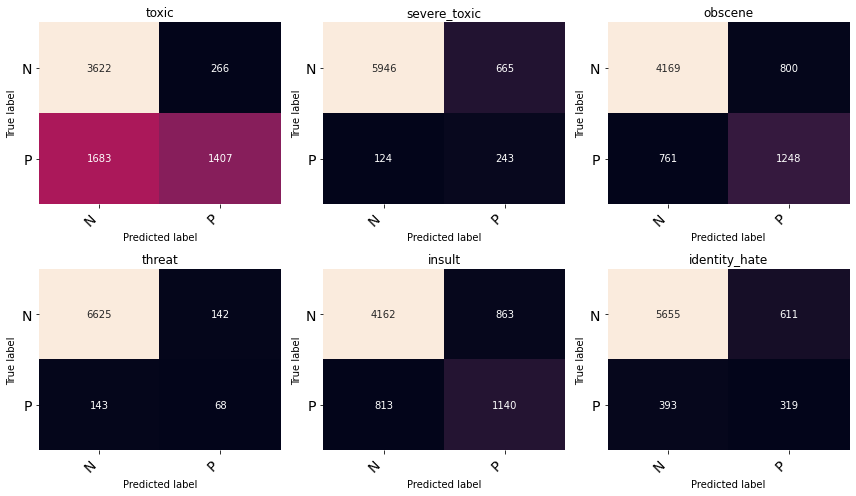

In [41]:
# Predictions
y_pred = tf_model.predict(test_x)
y_pred_tf = (y_pred > 0.5).astype("int32")

# Get confusion matrix
confusion_matrix = get_confusion_matrix(y_pred_tf)

# Get sum of confusion matrices by vectorizer
cm_sum = sum(confusion_matrix)
cm_list_vec.append(cm_sum.flatten())

# Add to dict
acc_dict['tf'] = get_accuracy(y_pred_tf)
micro_f1['tf'] = f1_score(y_true, y_pred_tf, average='micro')
micro_precision_score['tf'] = precision_score(y_true, y_pred_tf, average='micro')

# Plot confusion matrix
plot_confusion_matrix(confusion_matrix, labels)

In [42]:
print(classification_report(y_true, y_pred_tf, target_names=labels))

               precision    recall  f1-score   support

        toxic       0.84      0.46      0.59      3090
 severe_toxic       0.27      0.66      0.38       367
      obscene       0.61      0.62      0.62      2009
       threat       0.32      0.32      0.32       211
       insult       0.57      0.58      0.58      1953
identity_hate       0.34      0.45      0.39       712

    micro avg       0.57      0.53      0.55      8342
    macro avg       0.49      0.52      0.48      8342
 weighted avg       0.64      0.53      0.56      8342
  samples avg       0.19      0.21      0.19      8342

C:\Users\lamxw\anaconda3\envs\grp7_env\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lamxw\anaconda3\envs\grp7_env\lib\site-packages\sklear

## Word2Vec

C:\Users\lamxw\anaconda3\envs\grp7_env\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


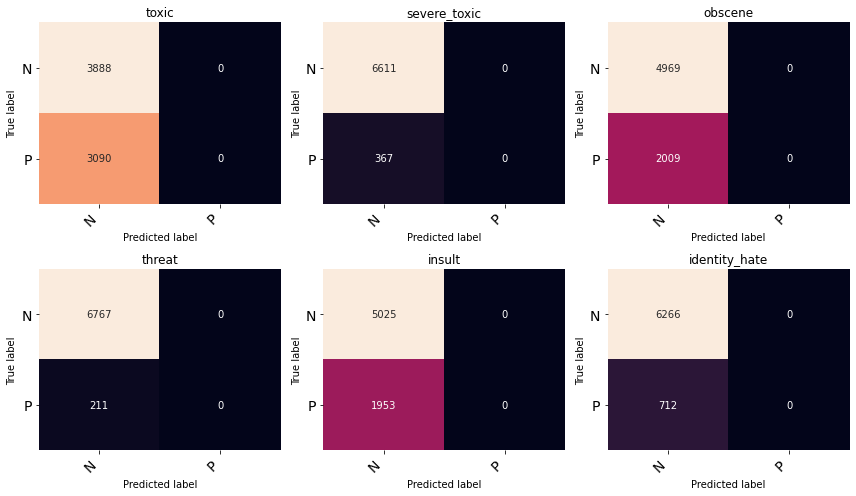

In [43]:
# Predictions
y_pred = w2v_model.predict(word2vec_test_x)
y_pred_w2v = (y_pred > 0.5).astype("int32")

# Get confusion matrix
confusion_matrix = get_confusion_matrix(y_pred_w2v)

# Get sum of confusion matrices by vectorizer
cm_sum = sum(confusion_matrix)
cm_list_vec.append(cm_sum.flatten())

# Add to dict
acc_dict['word2vec'] = get_accuracy(y_pred_w2v)
micro_f1['word2vec'] = f1_score(y_true, y_pred_w2v, average='micro')
micro_precision_score['word2vec'] = precision_score(y_true, y_pred_w2v, average='micro')

# Plot confusion matrix
plot_confusion_matrix(confusion_matrix, labels)

Word2Vec performed extremely badly.

In [61]:
print(classification_report(y_true, y_pred_w2v, target_names=labels))

               precision    recall  f1-score   support

        toxic       0.00      0.00      0.00      3090
 severe_toxic       0.00      0.00      0.00       367
      obscene       0.00      0.00      0.00      2009
       threat       0.00      0.00      0.00       211
       insult       0.00      0.00      0.00      1953
identity_hate       0.00      0.00      0.00       712

    micro avg       0.00      0.00      0.00      8342
    macro avg       0.00      0.00      0.00      8342
 weighted avg       0.00      0.00      0.00      8342
  samples avg       0.00      0.00      0.00      8342

C:\Users\lamxw\anaconda3\envs\grp7_env\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lamxw\anaconda3\envs\grp7_env\lib\site-packages\sklear

## Doc2Vec

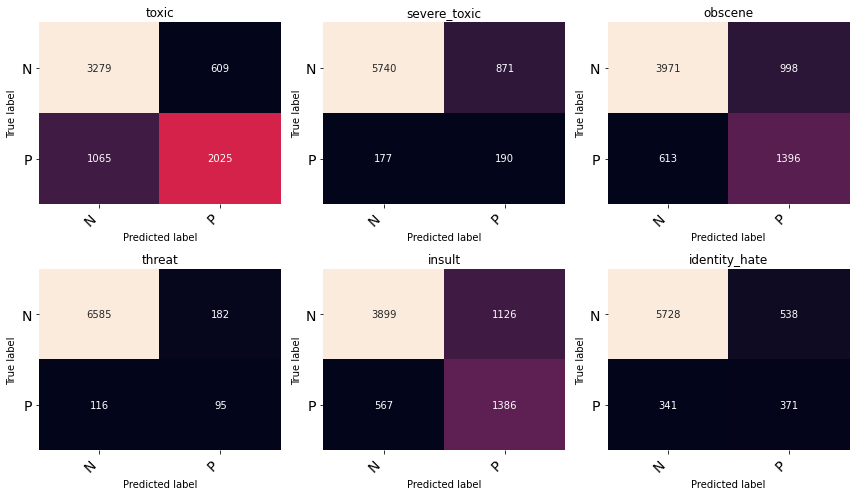

In [44]:
# Predictions
y_pred = d2v_model.predict(d2v_test_x)
y_pred_d2v = (y_pred > 0.5).astype("int32")

# Get confusion matrix
confusion_matrix = get_confusion_matrix(y_pred_d2v)

# Get sum of confusion matrices by vectorizer
cm_sum = sum(confusion_matrix)
cm_list_vec.append(cm_sum.flatten())

# Add to dict
acc_dict['doc2vec'] = get_accuracy(y_pred_d2v)
micro_f1['doc2vec'] = f1_score(y_true, y_pred_d2v, average='micro')
micro_precision_score['doc2vec'] = precision_score(y_true, y_pred_d2v, average='micro')

# Plot confusion matrix
plot_confusion_matrix(confusion_matrix, labels)

Doc2Vec did not perform very well in classifying every label except 'toxic', but performed decently in detecting negatives.

In [66]:
print(classification_report(y_true, y_pred_d2v, target_names=labels))

               precision    recall  f1-score   support

        toxic       0.76      0.64      0.70      3090
 severe_toxic       0.18      0.52      0.27       367
      obscene       0.58      0.70      0.64      2009
       threat       0.38      0.46      0.42       211
       insult       0.55      0.71      0.62      1953
identity_hate       0.41      0.53      0.47       712

    micro avg       0.56      0.65      0.60      8342
    macro avg       0.48      0.59      0.52      8342
 weighted avg       0.60      0.65      0.62      8342
  samples avg       0.23      0.28      0.24      8342

C:\Users\lamxw\anaconda3\envs\grp7_env\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lamxw\anaconda3\envs\grp7_env\lib\site-packages\sklear

Doc2Vec has decent Precision & Recall for 'toxic', but did not perform very well overall.

# Bar Charts of Confusion Matrices by Vectorizer

In [45]:
# Plot a bar graph to show the number of TN, FP, FN, TP for each classifier
# Params:
#   List -      @cm_list_by_classifier:  List of confusion matrices sum by classifier
#   List -      @classifier_names:       List of names of classifiers
def plot_confusion_matrix_bar_classifier(cm_list_by_classifier, classifier_names):

    # Colour of bars
    colours = ['pink', 'royalblue', 'orange', 'mediumseagreen', 'chocolate', 'blueviolet', 'red']
    # Confusion matrix list
    cm_list = np.asarray(cm_list_by_classifier)

    # 4 categories (Confusion matrix squares)
    n = 4
    r = np.arange(n)
    width = 0.1

    plt.figure(figsize=(15, 5))

    for i in range(len(classifier_names)):

        plt.bar(
            r + width*i, 
            cm_list_by_classifier[i], # Bar data
            align='edge', 
            color=colours[i], 
            edgecolor='black', 
            label=classifier_names[i], 
            width=width
        )

    plt.xlabel("Confusion Matrix Labels")
    plt.ylabel("Number of comments")
    plt.title(f"Confusion Matrix Values of Classifiers")
    
    plt.xticks(r + width * len(classifier_names)/2, ['TN','FP','FN','TP'])
    plt.legend()
    
    plt.show()

In [46]:
# Get names of all classifiers
vectorizer_names = list(micro_f1.keys())

# Create dataframe of accuracies
acc_df = pd.DataFrame.from_dict(acc_dict, orient='index', columns=['accuracy'])

# Create dataframe of micro-average F1-scores
micro_f1_df = pd.DataFrame.from_dict(micro_f1, orient='index', columns=['micro_avg_f1_score'])

# Create dataframe of micro-average precision scores
micro_precision_df = pd.DataFrame.from_dict(micro_precision_score, orient='index', columns=['micro_avg_precision_score'])

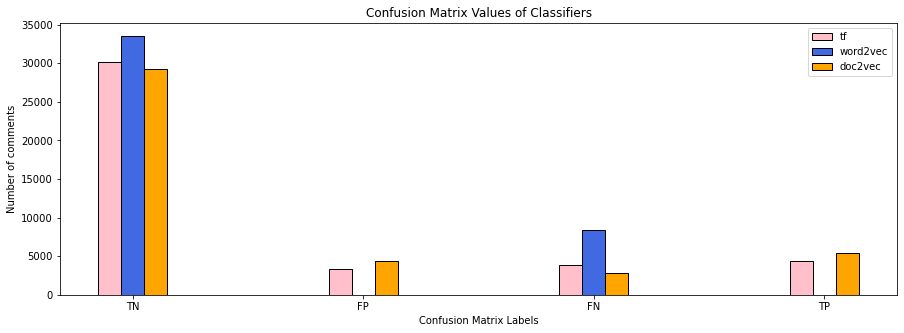

In [47]:
plot_confusion_matrix_bar_classifier(cm_list_vec, vectorizer_names)

At a glance, Word2Vec is the worst performing vectorizer. Doc2Vec has higher FP and TP values than Tensorflow, and Tensorflow has higher TN and FN values than Doc2Vec.

# Micro-average F1-score, Micro-average Precision score and Accuracy

In [48]:
print(micro_f1_df.sort_values(by=['micro_avg_f1_score'], ascending=False))

          micro_avg_f1_score
doc2vec             0.602681
tf                  0.549212
word2vec            0.000000


In [49]:
print(micro_precision_df.sort_values(by=['micro_avg_precision_score'], ascending=False))

          micro_avg_precision_score
tf                         0.569352
doc2vec                    0.558189
word2vec                   0.000000


In [50]:
print(acc_df.sort_values(by=['accuracy'], ascending=False))

          accuracy
doc2vec   0.827959
tf        0.826502
word2vec  0.800755


Since I used Tensorflow's Accuracy class, Word2Vec obtained a high accuracy. This is due to correctly not classifying any of the samples with any labels, which shows a limitation in Tensorflow's Accuracy metric.

I will compare them next with sklearn's Exact-Match-Ratio accuracy metric.

In [51]:
from sklearn.metrics import accuracy_score

sklearn_acc = {}

In [52]:
sklearn_acc['tf'] = accuracy_score(y_true, y_pred_tf)
sklearn_acc['word2vec'] = accuracy_score(y_true, y_pred_w2v)
sklearn_acc['doc2vec'] = accuracy_score(y_true, y_pred_d2v)

sklearn_acc_df = pd.DataFrame.from_dict(sklearn_acc, orient='index', columns=['accuracy_score'])
print(sklearn_acc_df.sort_values(by=['accuracy_score'], ascending=False))

          accuracy_score
word2vec        0.535254
tf              0.479937
doc2vec         0.477644


Surprisingly, Word2Vec still obtained the highest accuracy while being the worst performing vectorizer. Doc2Vec has a higher micro-average F1 score than Tensorflow, but Tensorflow had a better Precision score. Their accuracies with Keras metric were very close, but Doc2Vec had a slightly better score.

# Conclusion - Best Performing Classifier
## Doc2Vec

The comparison was obvious for this experiment. I was surprised at how badly Word2Vec performed as it seemed to be a popular library for text featurization. Undoubtedly it would have performed better with TFIDF implemented since I used Word2Vec with CBoW implementation, but I was unsuccessful in applying TFIDF to Word2Vec vectors and there were not many implementations of using TFIDF with Word2Vec vectors.

# Issues Faced
As mentioned above, Word2Vec was severely impacted by the lack of TFIDF usage. Many tutorials with Word2Vec used the mean of word vectors per sentence/document for model training, which was what I had done. However, the result was still extremely poor. There were very few implementations of TFIDF using Word2Vec vectors (I had only come across one and I had difficulty understanding the implementation). I had come across only one other tutorial that used Word2Vec and TFIDF, but the tutorial used TfidfVectorizer to vectorize the text first, then used the resulting IDF value with Word2Vec, which was not what I was looking for.

There wasn't a need to adjust or retrain for this experiment as Word2Vec and Doc2Vec implementations were straightforward.